# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## Imports

In [55]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)
import phik
from phik import resources, report

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [56]:
pwd

'C:\\Users\\Iweimer\\Desktop\\BB_Git\\1083-albumin-data-exploration\\ML\\N04_Cohort'

In [57]:
df_alb = pd.read_csv('N04_cohort_1.csv', index_col=0)

In [58]:
df_alb.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

            index_date  zip_code bed_size  ICU   LOS_days  90_day_mortality  \
0  2022-03-01 22:24:20         3  300-499    0   9.904630                 0   
1  2020-03-01 02:13:00         2  300-499    0   0.743750                 0   
2  2020-04-13 18:14:26         9   >=1000    0  13.193449                 0   
3  2020-11-17 04:53:12         9   >=1000    0   6.963056                 0   
4  2019-02-14 00:21:00         1   >=1000    1  34.975000                 0   

   90_day_readmission  days_until_readmission  hospital_free_days  Cirrhosis  \
0                 1.0               49.815810                  36          0   
1                 1.0                5.157639                  36          0   
2                 1.0               52.212396                   4          1   
3                 0.0              249.515255                  83          0   
4                 1.0               78.802083                  52          0   

   CCI  qSOFA    MELD  albumin_timing  SEWS  diuretic  bl_albumin_value  \
0    0      1     NaN               0     1         1               2.1   
1    0      1     NaN               1     2         1               0.6   
2    8      0     NaN               0     0         1               1.8   
3    1      0     NaN               2     0         1               1.0   
4    5      0  18.518               0     0         1               1.4   

   tenant  
0      74  
1      43  
2      57  
3      57  
4      45

In [59]:
df_alb.shape

(3283, 20)

In [60]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 3283
Number of unique encounters: 3283


In [61]:
df_alb.isnull().sum()

personid                     0
encounterid                  0
index_date                   0
zip_code                     0
bed_size                     0
ICU                          0
LOS_days                     0
90_day_mortality             0
90_day_readmission         356
days_until_readmission    1208
hospital_free_days           0
Cirrhosis                    0
CCI                          0
qSOFA                        0
MELD                      1890
albumin_timing               0
SEWS                         0
diuretic                     0
bl_albumin_value          1003
tenant                       0
dtype: int64

## Load Non Albumin Data

In [62]:
df_no_alb = pd.read_csv('N04_control_cohort_1.csv', index_col=0)

In [63]:
df_no_alb.head()

personid                           encounterid  \
0  01dbf4c1-1f52-43f2-b3eb-051fc849389d  8cd6f4b8-f563-4536-9f45-6ae77b17ac84   
1  090c39ae-5245-43d5-a021-c35b361fd549  83e9f76e-6a03-433a-a3ba-b8d61348ce83   
2  0a28e579-76bf-4e57-81ea-f9bd8042ee20  a28722a5-d17a-42a3-ba92-50fe775a35c9   
3  0b3104e9-2a1b-4d58-8b0b-e9e4ad3ea283  446d076c-7585-4911-b500-4ca3957d5faa   
4  10c13c68-25ba-411b-a0c6-a8e8973ccbe5  bf389676-1cb5-415e-ba0e-3dcc37c39b15   

            index_date  zip_code bed_size  ICU  LOS_days  90_day_mortality  \
0  2020-11-10 23:46:00         9   >=1000    0  2.072222                 0   
1  2018-07-31 00:43:00         8   >=1000    0  0.091667                 0   
2  2020-05-16 01:17:00         9   >=1000    0  2.904861                 0   
3  2020-06-04 21:24:28         9   >=1000    0  0.274664                 0   
4  2018-04-19 21:53:43         9   >=1000    0  0.379352                 0   

   90_day_readmission  days_until_readmission  hospital_free_days  Cirrhosis  \
0                 0.0              174.970104                   4          0   
1                 0.0              256.604861                  89          0   
2                 1.0                7.986111                  33          0   
3                 0.0                     NaN                  89          0   
4                 0.0              517.924931                  19          0   

   CCI  qSOFA  MELD  SEWS  diuretic  bl_albumin_value  tenant  
0    3      0   NaN     1         1               2.6      57  
1    0      0   NaN     0         0               NaN      63  
2    2      0  11.0     0         0               1.0      68  
3    2      0   NaN     0         0               NaN      50  
4    1      0   NaN     0         0               NaN      57

In [64]:
df_no_alb.shape

(18593, 19)

In [65]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 18593
Number of unique encounters: 18593


In [66]:
df_no_alb.isnull().sum()

personid                      0
encounterid                   0
index_date                    0
zip_code                      0
bed_size                     36
ICU                           0
LOS_days                      0
90_day_mortality              0
90_day_readmission          385
days_until_readmission     6958
hospital_free_days            0
Cirrhosis                     0
CCI                           0
qSOFA                         0
MELD                      13392
SEWS                          0
diuretic                      0
bl_albumin_value          10843
tenant                        0
dtype: int64

## Examine Difference In Vars

In [67]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'index_date',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_days',
 '90_day_mortality',
 '90_day_readmission',
 'days_until_readmission',
 'hospital_free_days',
 'Cirrhosis',
 'CCI',
 'qSOFA',
 'MELD',
 'albumin_timing',
 'SEWS',
 'diuretic',
 'bl_albumin_value',
 'tenant']

In [68]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'index_date',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_days',
 '90_day_mortality',
 '90_day_readmission',
 'days_until_readmission',
 'hospital_free_days',
 'Cirrhosis',
 'CCI',
 'qSOFA',
 'MELD',
 'SEWS',
 'diuretic',
 'bl_albumin_value',
 'tenant']

In [69]:
lst3 = [x for x in lst1 if x not in lst2]

In [70]:
lst3

['albumin_timing']

## Remove variables not relevant to analysis 

In [71]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['index_date'], inplace=True)

df_no_alb.drop(columns = ['index_date'], inplace=True)

In [72]:
df_alb['90_day_mortality'].value_counts()

0    2927
1     356
Name: 90_day_mortality, dtype: int64

In [73]:
df_no_alb['90_day_mortality'].value_counts()

0    18208
1      385
Name: 90_day_mortality, dtype: int64

## Create binary "Albumin" variable for both datasets

In [74]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [75]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

In [76]:
# df_alb.shape

In [77]:
# df_no_alb.shape

In [78]:
# df_alb.head()

In [79]:
# df_no_alb.head()

## Combine Datasets

In [80]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [81]:
df.shape

(21876, 20)

In [82]:
df.head(50)

personid  \
0   03d73314-b41d-445a-992a-cda0a9ea94e6   
1   0bd4cf71-9232-4d6c-bb76-b580a813d0b8   
2   18964eca-c75c-42c5-a393-a3d0bf88f3fe   
3   21b88c50-de34-435d-8c60-357d6d8ca892   
4   2fa666f4-5520-4ce9-b0bf-9ef4982d1d09   
5   38d8489b-a313-4c73-b080-bc25e7633e22   
6   40cd7ee5-00d8-45af-8781-7ea6e956d8e9   
7   48531d48-8a10-46f1-b80d-252e08c651cd   
8   57750366-889c-4585-b563-f508276c01c5   
9   6157eb45-64ec-4f4f-9801-efa17eb6d388   
10  66bd6ec0-cf8a-4fc5-888d-da344f29704a   
11  6ee7780f-14d7-4733-a47f-0b6c97e32870   
12  9205b10a-ce55-4143-a174-25ad4284fa3b   
13  9dcb0789-2736-49fd-b144-2558d0ab2ce2   
14  ac854817-0a3c-4fa7-b213-0fe334d4081c   
15  cc683602-ef80-460e-8d32-4a5b630e3718   
16  d3ab09b0-a0a5-4647-98c5-9217be5e0e94   
17  d5200a68-20ea-4bd8-85e6-bb94030d7232   
18  d57c9dc2-dd71-414d-bea0-85874248e4cf   
19  db080d95-41f1-4c7b-8147-4d91d52df53e   
20  df06a069-edd5-4aa5-afc9-b91b67bdb020   
21  e01f619e-cc8e-4f85-915f-e49c97cf5338   
22  e06177e1-7ebc-4f0a-a8b1-8192ea9a7877   
23  f6ba7090-6410-43a0-a44d-2b42b7123660   
24  0434db92-0a05-420b-9bc9-cea3821e44d0   
25  22aee392-4e82-49af-b0d0-dd865b7faac2   
26  2ad974f9-716c-43ce-9401-006b2ed34172   
27  3d2fcb09-5fea-414b-b149-183b8266db11   
28  44cded82-8b91-4ec3-9d03-faecc06d45cb   
29  618ef2fe-e7df-40a5-83b9-e79bdabb151b   
30  642ca113-885f-411a-875a-7d41e64c881a   
31  6c2c188d-fc9b-41db-be06-37f190d76d8b   
32  6c617f98-c94b-4a78-980d-54fce6ac9d1b   
33  860d68f9-7e99-4acd-a848-4524c6745123   
34  95b6a931-b083-4ef5-89de-03ea572ce082   
35  a21d8fd9-dd2e-4f53-8a44-39ada216bad3   
36  a44f3346-84bc-4601-8b60-5c5b1f0ad946   
37  a9f9c573-10c7-41a8-81ac-57c123bf6757   
38  aaed67fa-24be-4b13-8441-7b0369a8b410   
39  b72709f7-fb17-4ca0-b39f-2d7683214ed9   
40  d5fcc00b-ff1f-44bd-86c2-8605dfa21599   
41  d8b9716f-01d2-4ea1-8746-e0d30affac19   
42  db8b7cce-bee2-4f14-b8a1-747b4768315a   
43  09f8ddac-3974-4ba4-a988-6b1b112060fb   
44  10eb2026-a607-4f8a-bae0-ba13694edf9c   
45  172cb38e-7c90-4920-b732-fc0db28cbca5   
46  2da240a2-d465-4a1b-b473-f29d7bceda88   
47  43554546-032f-4154-bc6c-521d7ccc7dba   
48  5579911b-ce9c-45db-97ef-7ca928c4ec6e   
49  6095a8e5-5fde-41b8-818c-dfa410085419   

                             encounterid  zip_code bed_size  ICU   LOS_days  \
0   54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2         3  300-499    0   9.904630   
1   1684f4f6-2f4a-4441-8af9-c4165f550d54         2  300-499    0   0.743750   
2   8cefd6d1-8303-4201-a0bc-014fdf683574         9   >=1000    0  13.193449   
3   8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09         9   >=1000    0   6.963056   
4   2eacacdb-b236-4d9f-ac95-02ecd5397e6e         1   >=1000    1  34.975000   
5   2026c988-f9c1-4d09-839a-bff3fa250ceb         9   >=1000    0   9.218414   
6   6a0962cf-b9f7-4c4f-ba75-fc5207722a36         0  300-499    0   4.140972   
7   3639f1d7-780b-4766-b9e5-b70db8f617b5         2  200-299    0   1.348611   
8   bda4a1aa-0669-4c99-92e9-13d5975ef4d4         9   >=1000    0   6.257940   
9   138044c2-41cb-45a0-a391-1fecd3f69c4b         8   >=1000    0  20.516667   
10  a722c92b-6f93-4da5-8e0c-3e3313c3e9bb         8   >=1000    0  27.888889   
11  59c8a1ba-0aa9-4a0e-9764-d96eb5a2df03         9     <100    0   9.985417   
12  cbed3722-f471-4b46-a34a-1aee903ea733         1  500-999    0  40.428206   
13  5472a09c-e946-457e-80b9-21889a220c34         8  500-999    0  15.995139   
14  c0174d3e-6467-49ac-8d4a-252b48e038d4         1   >=1000    0  25.821528   
15  87b75e6a-7a8c-4505-8cdb-7ed2394b687c         7   >=1000    1  12.641667   
16  8bf764af-5d6a-448f-aaf3-a65ff35797bd         9   >=1000    1  17.463252   
17  cbccfcd4-a356-4975-8323-2fa9fe5b9835         2  200-299    0   0.679167   
18  227d340e-3541-4205-892c-3d7866ea973a         8   >=1000    0  14.559028   
19  cc821dcd-fdab-466d-aab5-3c4565666d63         9  200-299    0   6.729259   
20  0840f085-8d24-4368-8ec0-e7f67acee2de         1  500-999    0  17.388275   
21  b02b4adb-561f-49fa-93b7-72bf5b1ba8f7         

In [83]:
df.columns

Index(['personid', 'encounterid', 'zip_code', 'bed_size', 'ICU', 'LOS_days',
       '90_day_mortality', '90_day_readmission', 'days_until_readmission',
       'hospital_free_days', 'Cirrhosis', 'CCI', 'qSOFA', 'MELD',
       'albumin_timing', 'SEWS', 'diuretic', 'bl_albumin_value', 'tenant',
       'albumin'],
      dtype='object')

## Create New 24h Variable

In [84]:
def alb_24(row):
    score = 0
    if row['albumin'] == 1 and row['albumin_timing'] in (1,2):
        score += 1
    return score

df['albumin_24hrs'] = df.apply(lambda row: alb_24(row), axis=1)

In [85]:
df.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

   zip_code bed_size  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0         3  300-499    0   9.904630                 0                 1.0   
1         2  300-499    0   0.743750                 0                 1.0   
2         9   >=1000    0  13.193449                 0                 1.0   
3         9   >=1000    0   6.963056                 0                 0.0   
4         1   >=1000    1  34.975000                 0                 1.0   

   days_until_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  \
0               49.815810                  36          0    0      1     NaN   
1                5.157639                  36          0    0      1     NaN   
2               52.212396                   4          1    8      0     NaN   
3              249.515255                  83          0    1      0     NaN   
4               78.802083                  52          0    5      0  18.518   

   albumin_timing  SEWS  diuretic  bl_albumin_value  tenant  albumin  \
0             0.0     1         1               2.1      74        1   
1             1.0     2         1               0.6      43        1   
2             0.0     0         1               1.8      57        1   
3             2.0     0         1               1.0      57        1   
4             0.0     0         1               1.4      45        1   

   albumin_24hrs  
0              0  
1              1  
2              0  
3              1  
4              0

## Look at variables, null values

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21876 entries, 0 to 18592
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   personid                21876 non-null  object 
 1   encounterid             21876 non-null  object 
 2   zip_code                21876 non-null  int64  
 3   bed_size                21840 non-null  object 
 4   ICU                     21876 non-null  int64  
 5   LOS_days                21876 non-null  float64
 6   90_day_mortality        21876 non-null  int64  
 7   90_day_readmission      21135 non-null  float64
 8   days_until_readmission  13710 non-null  float64
 9   hospital_free_days      21876 non-null  int64  
 10  Cirrhosis               21876 non-null  int64  
 11  CCI                     21876 non-null  int64  
 12  qSOFA                   21876 non-null  int64  
 13  MELD                    6594 non-null   float64
 14  albumin_timing          3283 non-null 

In [87]:
df.isnull().sum()

personid                      0
encounterid                   0
zip_code                      0
bed_size                     36
ICU                           0
LOS_days                      0
90_day_mortality              0
90_day_readmission          741
days_until_readmission     8166
hospital_free_days            0
Cirrhosis                     0
CCI                           0
qSOFA                         0
MELD                      15282
albumin_timing            18593
SEWS                          0
diuretic                      0
bl_albumin_value          11846
tenant                        0
albumin                       0
albumin_24hrs                 0
dtype: int64

In [88]:
df.albumin_timing.value_counts()

0.0    1712
1.0    1023
2.0     548
Name: albumin_timing, dtype: int64

In [89]:
# fill in na albumin_timing as 0 for non-albumin patients

df['albumin_timing'] = df['albumin_timing'].fillna(0)

In [90]:
df.isnull().sum()

personid                      0
encounterid                   0
zip_code                      0
bed_size                     36
ICU                           0
LOS_days                      0
90_day_mortality              0
90_day_readmission          741
days_until_readmission     8166
hospital_free_days            0
Cirrhosis                     0
CCI                           0
qSOFA                         0
MELD                      15282
albumin_timing                0
SEWS                          0
diuretic                      0
bl_albumin_value          11846
tenant                        0
albumin                       0
albumin_24hrs                 0
dtype: int64

In [91]:
# fill in na albumin_timing as 0 for non-albumin patients

df['90_day_readmission'] = df['90_day_readmission'].fillna(0)

## Fill or Drop Rows with Null Values, Other

In [92]:
# drop variables 

df.drop(columns=['zip_code', 'bed_size', 'tenant'], inplace=True)

In [93]:
df.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

   ICU   LOS_days  90_day_mortality  90_day_readmission  \
0    0   9.904630                 0                 1.0   
1    0   0.743750                 0                 1.0   
2    0  13.193449                 0                 1.0   
3    0   6.963056                 0                 0.0   
4    1  34.975000                 0                 1.0   

   days_until_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  \
0               49.815810                  36          0    0      1     NaN   
1                5.157639                  36          0    0      1     NaN   
2               52.212396                   4          1    8      0     NaN   
3              249.515255                  83          0    1      0     NaN   
4               78.802083                  52          0    5      0  18.518   

   albumin_timing  SEWS  diuretic  bl_albumin_value  albumin  albumin_24hrs  
0             0.0     1         1               2.1        1              0  
1             1.0     2         1               0.6        1              1  
2             0.0     0         1               1.8        1              0  
3             2.0     0         1               1.0        1              1  
4             0.0     0         1               1.4        1              0

In [94]:
df.shape

(21876, 18)

In [95]:
# drop days_until_readmission, MELD, and bl_albumin because of missing values

df.drop(columns=['days_until_readmission', 'MELD', 'bl_albumin_value'], inplace=True)

In [96]:
df.isnull().sum()

personid              0
encounterid           0
ICU                   0
LOS_days              0
90_day_mortality      0
90_day_readmission    0
hospital_free_days    0
Cirrhosis             0
CCI                   0
qSOFA                 0
albumin_timing        0
SEWS                  0
diuretic              0
albumin               0
albumin_24hrs         0
dtype: int64

In [97]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [98]:
df.shape

(21876, 15)

In [99]:
df.isnull().sum()

personid              0
encounterid           0
ICU                   0
LOS_days              0
90_day_mortality      0
90_day_readmission    0
hospital_free_days    0
Cirrhosis             0
CCI                   0
qSOFA                 0
albumin_timing        0
SEWS                  0
diuretic              0
albumin               0
albumin_24hrs         0
dtype: int64

In [100]:
df.albumin_24hrs.value_counts()

0    20305
1     1571
Name: albumin_24hrs, dtype: int64

In [101]:
df.albumin_timing.value_counts()

0.0    20305
1.0     1023
2.0      548
Name: albumin_timing, dtype: int64

In [102]:
df.shape

(21876, 15)

In [103]:
df.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   9.904630                 0                 1.0                  36   
1    0   0.743750                 0                 1.0                  36   
2    0  13.193449                 0                 1.0                   4   
3    0   6.963056                 0                 0.0                  83   
4    1  34.975000                 0                 1.0                  52   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  diuretic  albumin  \
0          0    0      1             0.0     1         1        1   
1          0    0      1             1.0     2         1        1   
2          1    8      0             0.0     0         1        1   
3          0    1      0             2.0     0         1        1   
4          0    5      0             0.0     0         1        1   

   albumin_24hrs  
0              0  
1              1  
2              0  
3              1  
4              0

In [104]:
df.shape

(21876, 15)

In [105]:
df.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   9.904630                 0                 1.0                  36   
1    0   0.743750                 0                 1.0                  36   
2    0  13.193449                 0                 1.0                   4   
3    0   6.963056                 0                 0.0                  83   
4    1  34.975000                 0                 1.0                  52   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  diuretic  albumin  \
0          0    0      1             0.0     1         1        1   
1          0    0      1             1.0     2         1        1   
2          1    8      0             0.0     0         1        1   
3          0    1      0             2.0     0         1        1   
4          0    5      0             0.0     0         1        1   

   albumin_24hrs  
0              0  
1              1  
2              0  
3              1  
4              0

## Remove outliers

In [106]:
# remove outliers more than 3sd from the mean

z_scores = stats.zscore(df[['LOS_days', 'hospital_free_days']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [107]:
df.shape

(21785, 15)

In [108]:
df.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   9.904630                 0                 1.0                  36   
1    0   0.743750                 0                 1.0                  36   
2    0  13.193449                 0                 1.0                   4   
3    0   6.963056                 0                 0.0                  83   
4    1  34.975000                 0                 1.0                  52   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  diuretic  albumin  \
0          0    0      1             0.0     1         1        1   
1          0    0      1             1.0     2         1        1   
2          1    8      0             0.0     0         1        1   
3          0    1      0             2.0     0         1        1   
4          0    5      0             0.0     0         1        1   

   albumin_24hrs  
0              0  
1              1  
2              0  
3              1  
4              0

## Save a copy of the df

In [109]:
# save df copy

f_df = df.copy()

## Look at Variable Correlations, Significance with Outcome Variables

In [110]:
df = f_df.copy()

## Export as csv for other analysis

In [111]:
f_df.to_csv('albumin_cleaned_for_psm_1.csv', index=False)

In [ ]:
## update: will convert to categorical after matching

## Convert LOS_Hours and ICU_LOS_hours Vars to Days Vars

In [360]:
f_df['LOS_days'] = f_df['LOS_hours']/24
f_df.drop(columns=['LOS_hours'], inplace=True)

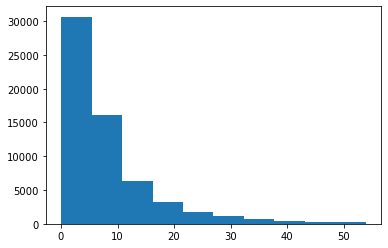

In [361]:
plt.hist(f_df['LOS_days']);

In [362]:
f_df['LOS_days'].describe()

count    61109.000000
mean         8.458117
std          8.253185
min          0.050000
25%          3.250694
50%          5.402778
75%         10.197917
max         53.870833
Name: LOS_days, dtype: float64

## Convert LOS_days to Categorical

In [363]:
# Calculate Tertiles

q1 = f_df['LOS_days'].quantile(q=(1/3))
q2 = f_df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

3.9493364197530854
8.041435185185177


In [364]:
# bin the LOS_days var

LOS = f_df['LOS_days']
m = max(LOS)

bins = [0, 3.9493364197530854, 8.041435185185177, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

f_df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [365]:
f_df['LOS_days'].value_counts()

0    20370
2    20370
1    20369
Name: LOS_days, dtype: int64